# 🧾 Personal Expense Tracker
This notebook lets you record and visualize your expenses. You can add new ones via input prompts.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)

In [8]:
# Initialize the DataFrame
expenses = pd.DataFrame(columns=["Date", "Category", "Description", "Amount"])

# Add sample data
sample_data = [
    {"Date": "2025-06-01", "Category": "Food", "Description": "Groceries", "Amount": 120.50},
    {"Date": "2025-06-02", "Category": "Transport", "Description": "Gas", "Amount": 45.00},
    {"Date": "2025-06-03", "Category": "Entertainment", "Description": "Movies", "Amount": 15.00},
    {"Date": "2025-06-03", "Category": "Food", "Description": "Dining Out", "Amount": 30.25},
    {"Date": "2025-06-04", "Category": "Utilities", "Description": "Electricity Bill", "Amount": 65.75}
]

for entry in sample_data:
    expenses.loc[len(expenses)] = entry

# Convert Date column
expenses["Date"] = pd.to_datetime(expenses["Date"])
expenses.head()

,Date,Category,Description,Amount
0,2025-06-01,Food,Groceries,120.50
1,2025-06-02,Transport,Gas,45.00
2,2025-06-03,Entertainment,Movies,15.00
3,2025-06-03,Food,Dining Out,30.25
4,2025-06-04,Utilities,Electricity Bill,65.75


In [9]:
# ✅ Add expenses via user input
while True:
    print("\nEnter a new expense (leave Date empty to stop):")
    date_str = input("Date (YYYY-MM-DD): ").strip()
    if not date_str:
        break
    category = input("Category: ").strip()
    description = input("Description: ").strip()
    try:
        amount = float(input("Amount: ").strip())
    except ValueError:
        print("Invalid amount. Try again.")
        continue

    try:
        date = pd.to_datetime(date_str)
    except Exception as e:
        print("Invalid date format. Try again.")
        continue

    expenses.loc[len(expenses)] = {
        "Date": date,
        "Category": category,
        "Description": description,
        "Amount": amount
    }
    print("Expense added!")


Enter a new expense (leave Date empty to stop):


Date (YYYY-MM-DD):  


In [13]:
# 📊 Summary by category
category_summary = expenses.groupby("Category")["Amount"].sum().reset_index()
category_summary.sort_values(by="Amount", ascending=False)

,Category,Amount
1,Food,150.75
3,Utilities,65.75
2,Transport,45.00
0,Entertainment,15.00


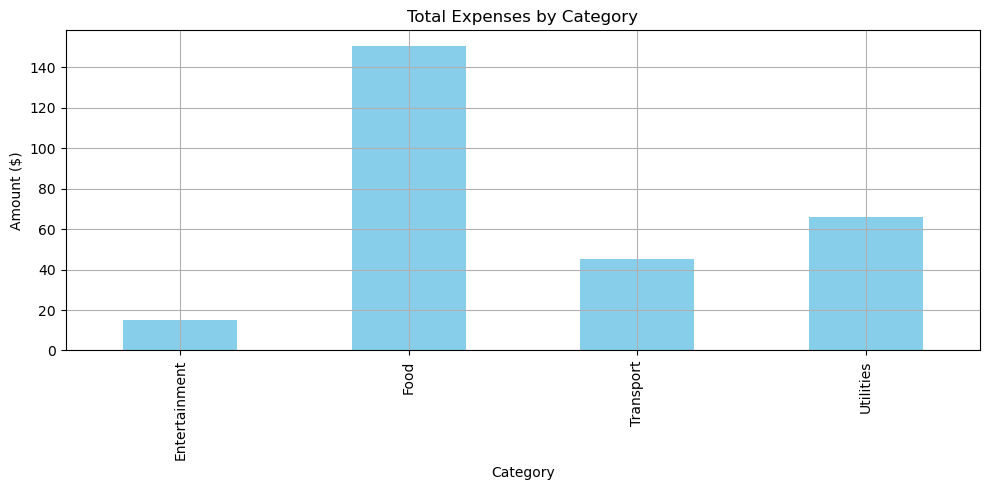

In [14]:
# 📈 Bar chart
category_summary.plot(kind="bar", x="Category", y="Amount", legend=False, color="skyblue")
plt.title("Total Expenses by Category")
plt.ylabel("Amount ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# 💾 Save to CSV
expenses.to_csv("my_expenses.csv", index=False)
print("Expenses saved to 'my_expenses.csv'")

Expenses saved to 'my_expenses.csv'
